In [1]:
#%run MChain.ipynb
import numpy as np
import graphviz as gv
from MChain import MChain

# construct a Markov chain

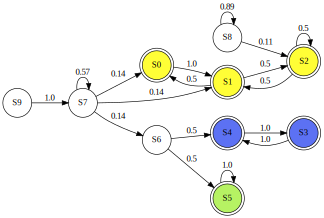

In [2]:
# building a chain using an (unnormalized) transition matrix

T10 = np.array([[0,1,0,0,0,0,0,0,0,0],[1,0,1,0,0,0,0,0,0,0],
                [0,1,1,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],
                [0,0,0,0,1,1,0,0,0,0],[1,1,0,0,0,0,1,4,0,0],
                [0,0,1,0,0,0,0,0,8,0],[0,0,0,0,0,0,0,1,0,0]])

mc = MChain()
mc.from_matrix(T10, prefix='S')
mc.display() 

# analyse a chain

In [3]:
# calculate relevant data 
mc.analyse()

In [4]:
print('transient states:', [i0 for i0 in mc.list_states() if mc.ti(i0)])
print('recurrent states:', [i0 for i0 in mc.list_states() if mc.ri(i0)])

transient states: ['S6', 'S7', 'S8', 'S9']
recurrent states: ['S0', 'S1', 'S2', 'S3', 'S4', 'S5']


In [5]:
print('expected absorbing times starting from:\n')

for i0 in ['S9', 'S7', 'S6', 'S8', 'S4']:
    print(f'  {i0}: {mc.ai(i0)}') 

expected absorbing times starting from:

  S9: 3.6666666666666665
  S7: 2.6666666666666665
  S6: 1.0
  S8: 8.999999999999996
  S4: 1.0


In [6]:
print('period of states:\n')

for i0 in ['S2', 'S4', 'S6']:
    print(f'  {i0}: {mc.pi(i0)}')

period of states:

  S2: 1
  S4: 2
  S6: 0


In [7]:
print('relative duration in states:\n')

for i0 in ['S2', 'S4', 'S6', 'S9']:
    print(f'  {i0}: {mc.di(i0)} %')

relative duration in states:

  S2: 0.4 %
  S4: 0.5 %
  S6: 0.0 %
  S9: 0.0 %


In [8]:
print('internal state ids:\n')

for i0 in ['S2', 'S4', 'S6', 'S9']:
    print(f'  {i0}: {mc.ii(i0)}')

internal state ids:

  S2: 2
  S4: 4
  S6: 6
  S9: 9


In [9]:
print('state names of state ids:\n')

for i0 in [1,3, 5, 2]:
    print(f'  {i0}: {mc.si(i0)}')

state names of state ids:

  1: S1
  3: S3
  5: S5
  2: S2


In [10]:
print('class of states:\n')

for i0 in ['S2', 'S4', 'S6', 'S9']:
    print(f'  {i0}: {mc.ci(i0)}')

class of states:

  S2: 1
  S4: 2
  S6: 0
  S9: 0


# probabilities and indicators

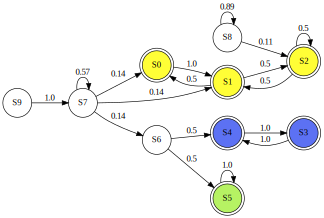

In [11]:
mc.display()

### transition probabilities: Pij, P

In [12]:
print(mc.Pij('S7','S0'))
print(mc.Pij('S6','S4'))
print('')
print(np.round(mc.P,2))

0.14285714285714285
0.5

[[0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.5  0.   0.5  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.5  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.5  0.5  0.   0.   0.   0.  ]
 [0.14 0.14 0.   0.   0.   0.   0.14 0.57 0.   0.  ]
 [0.   0.   0.11 0.   0.   0.   0.   0.   0.89 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]]


### probability to reach a state: Hij, H 

In [13]:
print(mc.Hij('S9','S5'))
print(mc.Hij('S9','S1'))
print(mc.Hij('S8','S0'))
print('')
print(np.round(mc.H,2))

0.16666666666666666
0.6666666666666666
1.0

[[1.   1.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   1.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   1.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.5  0.5  0.   0.   0.   0.  ]
 [0.67 0.67 0.67 0.17 0.17 0.17 0.33 0.57 0.   0.  ]
 [1.   1.   1.   0.   0.   0.   0.   0.   0.89 0.  ]
 [0.67 0.67 0.67 0.17 0.17 0.17 0.33 1.   0.   0.  ]]


### reachability: Rij, R

In [14]:
# is there a path from state i to state j?

print(mc.Rij('S9','S4'))
print(mc.Rij('S7','S8'))
print('')
print(mc.R.astype(int))

True
False

[[1 1 1 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 0 0 0 0 0 1 0]
 [1 1 1 1 1 1 1 1 0 0]]


### visits indicator: Eij, E

In [15]:
# are visits from state i to state j possible, impossible or sure
# Eij: 0: impossible, 1: sure -1: possible

print(mc.Eij('S9','S5')) # possible
print(mc.Eij('S8','S0')) # sure
print(mc.Eij('S6','S8')) # 
print('')
print(mc.E)

-1
1
0

[[ 1  1  1  0  0  0  0  0  0  0]
 [ 1  1  1  0  0  0  0  0  0  0]
 [ 1  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0 -1 -1 -1  0  0  0  0]
 [-1 -1 -1 -1 -1 -1 -1 -1  0  0]
 [ 1  1  1  0  0  0  0  0 -1  0]
 [-1 -1 -1 -1 -1 -1 -1  1  0  0]]


### expected time to visit a state: Tij, T

In [16]:
# if it is not sure to visit state j from state i, Tij=-1

print(mc.Tij('S2','S0'))
print(mc.Tij('S8','S1'))      
print('')
print(np.round(mc.T,2))

6.0
10.999999999999996

[[ 5.   1.   4.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [ 4.   2.5  3.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [ 6.   2.   2.5 -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.   2.   1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.   1.   2.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.   1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [15.  11.   9.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.   1.  -1.  -1. ]]


### expected visit count of state j starting in state i: Vij, V

In [17]:
# Vij=-1 indicates possible or infinit visits

print(mc.Vij('S7','S7'))
print(mc.Vij('S9','S7'))
print(mc.Vij('S4','S3')) # infinit visists
print(mc.Vij('S9','S3')) # visit only possible  (Eij==-1)
print('')
print(np.round(mc.V,2))

1.3333333333333333
2.333333333333333
-1.0
-1.0

[[-1.   -1.   -1.    0.    0.    0.    0.    0.    0.    0.  ]
 [-1.   -1.   -1.    0.    0.    0.    0.    0.    0.    0.  ]
 [-1.   -1.   -1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -1.   -1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -1.   -1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -1.   -1.   -1.    0.    0.    0.    0.  ]
 [-1.   -1.   -1.   -1.   -1.   -1.    0.33  1.33  0.    0.  ]
 [-1.   -1.   -1.    0.    0.    0.    0.    0.    8.    0.  ]
 [-1.   -1.   -1.   -1.   -1.   -1.    0.33  2.33  0.    0.  ]]


### class absorbing probabilities: Qi, Q

In [18]:
print('absorbing probabilities of classes 1,2,3...:', np.round(mc.Qi('S7'),2))
print('')
print(np.round(mc.Q,2))

absorbing probabilities of classes 1,2,3...: [0.67 0.17 0.17]

[[1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.5  0.5 ]
 [0.67 0.17 0.17]
 [1.   0.   0.  ]
 [0.67 0.17 0.17]]


# birth-death process

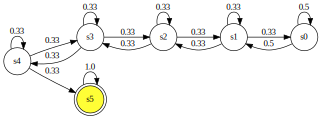

In [19]:
N = 6
U = np.eye(N) + np.eye(N,k=-1) + np.eye(N,k=1)
U[N-1,N-2] = 0

mc1 = MChain()
mc1.from_matrix(U)
mc1.display()
mc1.analyse()

In [20]:
# expected times to visit states 

mc1.T

array([[-1.,  2.,  7., 15., 26., 40.],
       [-1., -1.,  5., 13., 24., 38.],
       [-1., -1., -1.,  8., 19., 33.],
       [-1., -1., -1., -1., 11., 25.],
       [-1., -1., -1., -1., -1., 14.],
       [-1., -1., -1., -1., -1.,  1.]])

In [21]:
# expected visit counts until absorption

mc1.V

array([[ 9., 12.,  9.,  6.,  3., -1.],
       [ 8., 11.,  9.,  6.,  3., -1.],
       [ 6.,  9.,  8.,  6.,  3., -1.],
       [ 4.,  6.,  6.,  5.,  3., -1.],
       [ 2.,  3.,  3.,  3.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0., -1.]])